
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of investments options from the dow30 and alabama.  Construct portfolios from the Investment Options in the dow30+alabama and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['dow30-galaxy', 'alabama-galaxy']
risk_free_rate = 0
annual_returns = '5 Yr'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,MMM,3M,US Stocks:Industrials,-19.39,-11.01,-25.11,-5.02,-10.68,38.27,26.36,23.45,-10.68,-250.45
1,AXP,American Express,US Stocks:Financials,635.26,94.66,-4.36,11.29,13.34,42.71,13.22,34.05,13.34,0.39
2,AMGN,Amgen,US Stocks:Healthcare,-51.05,-30.70,11.21,7.50,8.96,19.16,10.92,24.57,8.96,0.36
3,AAPL,Apple,US Stocks:Technology,845.52,1.12,-13.12,25.89,30.53,22.21,7.79,32.48,30.53,0.94
4,BA,Boeing,US Stocks:Industrials,128.77,354.42,0.48,-12.65,-9.12,24.53,11.65,54.28,-9.12,-495.03
5,CAT,Caterpillar,US Stocks:Industrials,42.73,60.85,22.05,26.55,11.23,27.01,15.16,32.23,11.23,0.35
6,CVX,Chevron,US Stocks:Energy,-29.42,-23.68,29.90,22.36,10.92,29.96,18.45,38.57,10.92,0.28
7,CSCO,Cisco,US Stocks:Technology,54.66,43.02,-7.94,5.21,6.69,19.26,10.70,27.87,6.69,0.24
8,KO,Coca-Cola,US Stocks:Consumer Staples,-40.55,7.35,2.48,4.17,8.23,17.09,12.48,20.46,8.23,0.40
9,DIS,Disney,US Stocks:Communication Services,1701.75,30.11,-21.65,-7.13,1.39,24.12,6.72,38.41,1.39,0.04


In [6]:
# rank
rank = bb.rank(df, rank_by='Sharpe Ratio')
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
20,MSFT,Microsoft,US Stocks:Technology,229.36,82.90,-13.50,16.00,24.22,31.06,14.09,23.56,24.22,1.03
3,AAPL,Apple,US Stocks:Technology,845.52,1.12,-13.12,25.89,30.53,22.21,7.79,32.48,30.53,0.94
22,PG,Procter & Gamble,US Stocks:Consumer Staples,-50.00,26.56,-8.71,6.96,13.51,17.59,11.90,18.00,13.51,0.75
25,UNH,UnitedHealth Group,US Stocks:Healthcare,-68.67,-44.55,1.80,21.50,16.43,26.77,20.45,22.12,16.43,0.74
19,MRK,Merck,US Stocks:Healthcare,-57.65,18.78,30.35,11.06,16.41,22.66,18.00,22.66,16.41,0.72
18,MCD,McDonald's,US Stocks:Consumer Staples,-4.97,-11.56,3.91,9.45,11.60,20.70,11.26,20.63,11.60,0.56
12,HD,Home Depot,US Stocks:Consumer Discretionary,139.75,77.75,-5.52,16.28,13.74,26.41,14.75,26.68,13.74,0.51
27,V,Visa,US Stocks:Financials,238.30,52.82,-0.46,5.25,13.81,18.19,6.63,27.42,13.81,0.50
21,NKE,Nike,US Stocks:Consumer Discretionary,171.58,263.27,-11.99,10.15,14.73,18.67,7.80,32.35,14.73,0.46
33,HIBB,Hibbett Sports,US Stocks:Consumer Discretionary,37.36,47.04,11.75,43.27,25.82,41.28,25.33,60.23,25.82,0.43


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])[:20]
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Top10 Portfolio'
}
top10 = list(rank['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': 'Sharpe Ratio'},
    'Investment Option': {'weight_by': 'Equal'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,MSFT,AAPL,PG,UNH,MRK,MCD,HD,V,NKE,HIBB,...,KO,WMT,AXP,JNJ,AMGN,CAT,VMC,HON,CVX,Ranked Portfolio
Annual Returns,24.22,30.53,13.51,16.43,16.41,11.60,13.74,13.81,14.73,25.82,...,8.23,8.10,13.34,6.46,8.96,11.23,7.75,8.43,10.92,15.25
Std Dev,23.56,32.48,18.00,22.12,22.66,20.63,26.68,27.42,32.35,60.23,...,20.46,20.44,34.05,17.60,24.57,32.23,24.23,28.35,38.57,23.81
Sharpe Ratio,1.03,0.94,0.75,0.74,0.72,0.56,0.51,0.50,0.46,0.43,...,0.40,0.40,0.39,0.37,0.36,0.35,0.32,0.30,0.28,0.64
Weight,0.11,0.11,0.05,0.05,0.05,0.05,0.02,0.04,0.02,0.02,...,0.05,0.02,0.04,0.05,0.05,0.05,0.05,0.05,0.06,1.00
Worst Typical Down Year,-22.90,-34.43,-22.49,-27.81,-28.91,-29.66,-39.62,-41.03,-49.97,-94.64,...,-32.69,-32.78,-54.76,-28.74,-40.18,-53.23,-40.71,-48.27,-66.22,-32.38
Black Swan,-46.46,-66.91,-40.49,-49.93,-51.57,-50.29,-66.30,-68.45,-82.32,-154.87,...,-53.15,-53.22,-88.81,-46.34,-64.75,-85.46,-64.94,-76.62,-104.79,-56.19


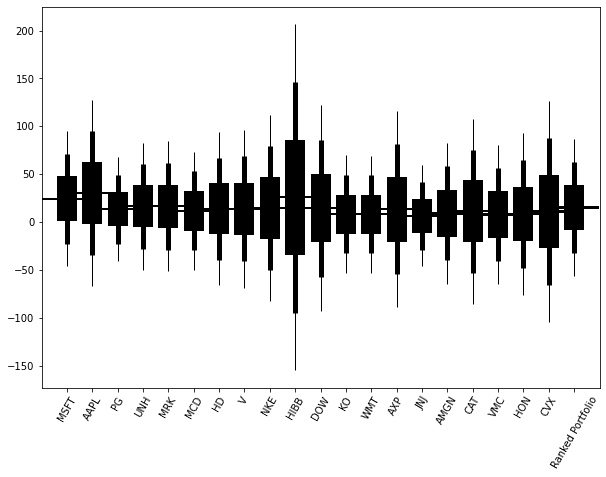

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

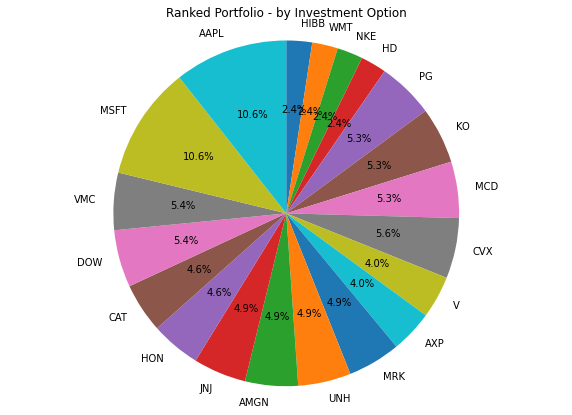

HIBB   0.02
WMT    0.02
NKE    0.02
HD     0.02
PG     0.05
KO     0.05
MCD    0.05
CVX    0.06
V      0.04
AXP    0.04
MRK    0.05
UNH    0.05
AMGN   0.05
JNJ    0.05
HON    0.05
CAT    0.05
DOW    0.05
VMC    0.05
MSFT   0.11
AAPL   0.11



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    MSFT                           0.1060
    AAPL                           0.1060
    PG                             0.0527
    UNH                            0.0494
    MRK                            0.0494
    MCD                            0.0527
    HD                             0.0241
    V                              0.0396
    NKE                            0.0241
    HIBB                           0.0241
    DOW                            0.0536
    KO                             0.0527
    WMT                            0.0241
    AXP                            0.0396
    JNJ                            0.0494
    AMGN                           0.0494
    CAT                            0.0465
    VMC                            0.0536
    HON                            0.0465
    CVX                            0.0565


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': -20
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer

Impossible criteria specified, lower your expectations!!!


### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).